In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("C:/Users/Bhargavi/OneDrive/Desktop/Food_Dataset/data/synthetic_food_dataset_imbalanced.csv")

# repeat minimal preprocessing
num_cols = df.select_dtypes(include="number").columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df["Is_Vegan"] = df["Is_Vegan"].astype(int)
df["Is_Gluten_Free"] = df["Is_Gluten_Free"].astype(int)
df = pd.get_dummies(df, columns=["Meal_Type", "Preparation_Method"], drop_first=True)

X = df.drop("Food_Name", axis=1)
y = df["Food_Name"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [4]:
#Logistic Regrssion
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.9869085173501577
              precision    recall  f1-score   support

       Apple       0.99      0.98      0.98       300
      Banana       0.96      0.99      0.98       240
      Burger       0.99      0.97      0.98      1000
       Donut       1.00      0.98      0.99       900
   Ice Cream       0.99      0.99      0.99       600
       Pasta       1.00      0.99      0.99       800
       Pizza       0.96      0.99      0.98      1200
       Salad       1.00      0.98      0.99       200
       Steak       1.00      0.99      0.99       400
       Sushi       0.99      1.00      0.99       700

    accuracy                           0.99      6340
   macro avg       0.99      0.99      0.99      6340
weighted avg       0.99      0.99      0.99      6340



In [5]:
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred)
    })


In [7]:
results_df = pd.DataFrame(results)
results_df



,Model,Accuracy
0,Decision Tree,0.981230
1,Random Forest,0.985962
2,KNN,0.983596
3,Gradient Boosting,0.987855


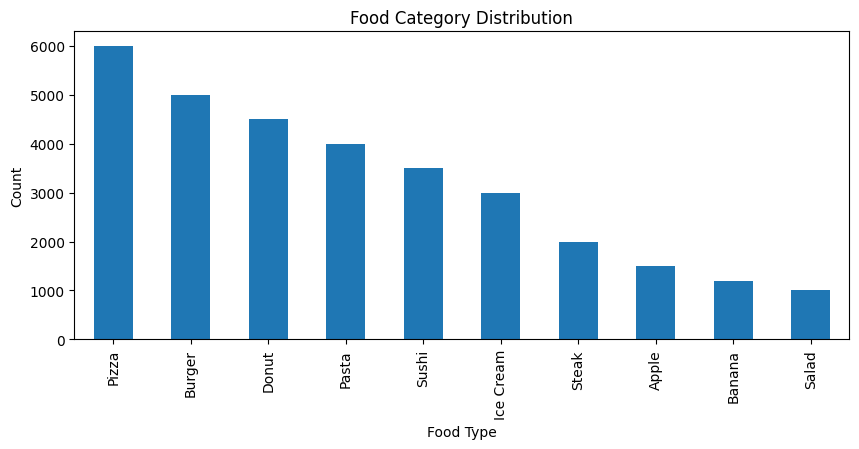

In [8]:
import matplotlib.pyplot as plt

df['Food_Name'].value_counts().plot(kind='bar', figsize=(10,4))
plt.title("Food Category Distribution")
plt.xlabel("Food Type")
plt.ylabel("Count")
plt.show()


In [12]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)

gb_model.fit(X_train_scaled, y_train)


,"loss loss: {'log_loss', 'exponential'}, default='log_loss'The loss function to be optimized. 'log_loss' refers to binomial andmultinomial deviance, the same as used in logistic regression.It is a good choice for classification with probabilistic outputs.For loss 'exponential', gradient boosting recovers the AdaBoost algorithm.",'log_loss'
,"learning_rate learning_rate: float, default=0.1Learning rate shrinks the contribution of each tree by `learning_rate`.There is a trade-off between learning_rate and n_estimators.Values must be in the range `[0.0, inf)`.For an example of the effects of this parameter and its interaction with``subsample``, see:ref:`sphx_glr_auto_examples_ensemble_plot_gradient_boosting_regularization.py`.",0.1
,"n_estimators n_estimators: int, default=100The number of boosting stages to perform. Gradient boostingis fairly robust to over-fitting so a large number usuallyresults in better performance.Values must be in the range `[1, inf)`.",100
,"subsample subsample: float, default=1.0The fraction of samples to be used for fitting the individual baselearners. If smaller than 1.0 this results in Stochastic GradientBoosting. `subsample` interacts with the parameter `n_estimators`.Choosing `subsample < 1.0` leads to a reduction of varianceand an increase in bias.Values must be in the range `(0.0, 1.0]`.",1.0
,"criterion criterion: {'friedman_mse', 'squared_error'}, default='friedman_mse'The function to measure the quality of a split. Supported criteria are'friedman_mse' for the mean squared error with improvement score byFriedman, 'squared_error' for mean squared error. The default value of'friedman_mse' is generally the best as it can provide a betterapproximation in some cases... versionadded:: 0.18",'friedman_mse'
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, values must be in the range `[2, inf)`.- If float, values must be in the range `(0.0, 1.0]` and `min_samples_split` will be `ceil(min_samples_split * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, values must be in the range `[1, inf)`.- If float, values must be in the range `(0.0, 1.0)` and `min_samples_leaf` will be `ceil(min_samples_leaf * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.Values must be in the range `[0.0, 0.5]`.",0.0
,"max_depth max_depth: int or None, default=3Maximum depth of the individual regression estimators. The maximumdepth limits the number of nodes in the tree. Tune this parameterfor best performance; the best value depends on the interactionof the input variables. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.If int, values must be in the range `[1, inf)`.",3
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.Values must be in the range `[0.0, inf)`.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, 

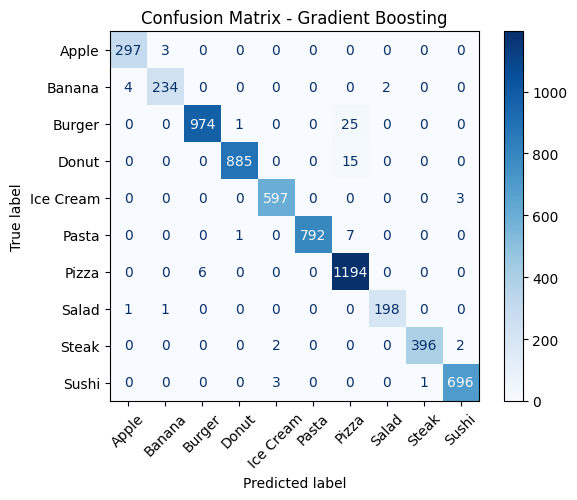

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred_gb = gb_model.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred_gb)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=gb_model.classes_
)

disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()


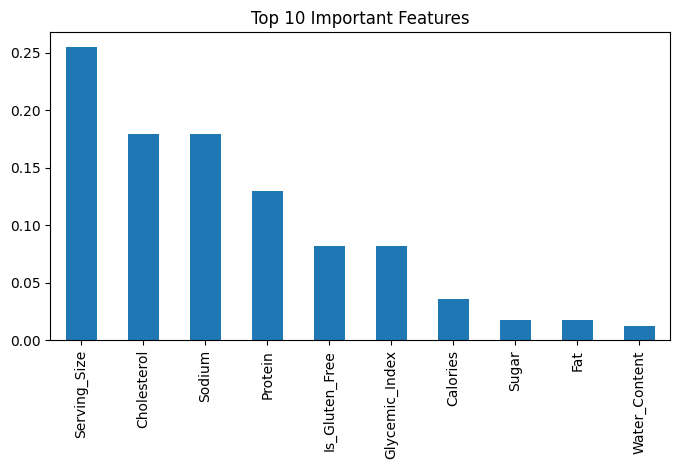

In [14]:
import pandas as pd

importance = pd.Series(
    gb_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importance.head(10).plot(kind='bar', figsize=(8,4))
plt.title("Top 10 Important Features")
plt.show()


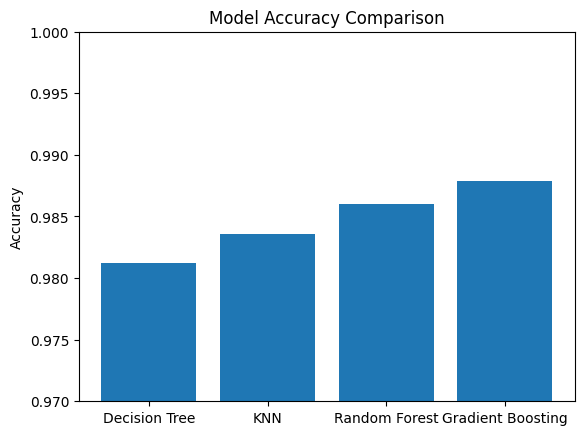

In [15]:
models = ['Decision Tree', 'KNN', 'Random Forest', 'Gradient Boosting']
accuracy = [0.9812, 0.9836, 0.9860, 0.9879]

plt.bar(models, accuracy)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.97, 1.0)
plt.show()
